In [12]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

x = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

le.transform(['M', 'B'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1)

# Normalizar dados 
from sklearn.preprocessing import StandardScaler
# Reduzir a dimensionalidade
from sklearn.decomposition import PCA
# Regressão Logística
from sklearn.linear_model import LogisticRegression
# Pipeline
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=2),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Usando validação cruzada k-fold para avaliar o desempenho do modelo

Dilema víes x variância

# O método holdout

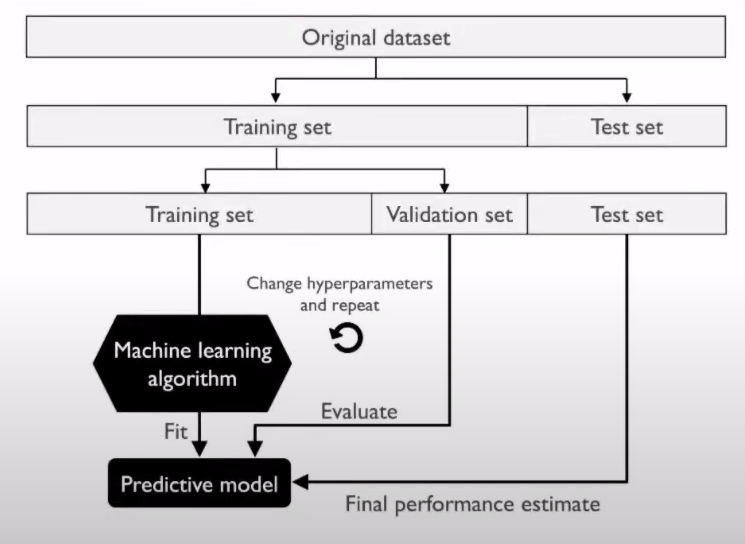

In [4]:
from IPython.display import Image
Image(filename='/content/holdout.png', width=500)

# O método k-fold

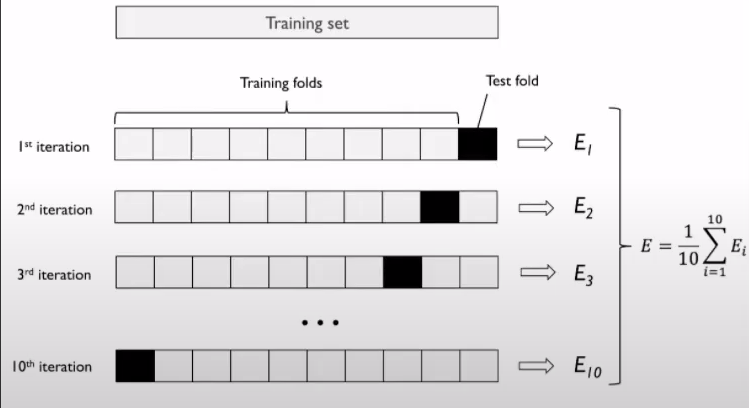

In [6]:
Image(filename='/content/kfold.png', width=500)

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold %2d, Distribuição da classe %s, Acur.: %.3f' % ((k + 1), np.bincount(y_train[train]), score))

Fold  1, Distribuição da classe [256 153], Acur.: 0.935
Fold  2, Distribuição da classe [256 153], Acur.: 0.935
Fold  3, Distribuição da classe [256 153], Acur.: 0.957
Fold  4, Distribuição da classe [256 153], Acur.: 0.957
Fold  5, Distribuição da classe [256 153], Acur.: 0.935
Fold  6, Distribuição da classe [257 153], Acur.: 0.956
Fold  7, Distribuição da classe [257 153], Acur.: 0.978
Fold  8, Distribuição da classe [257 153], Acur.: 0.933
Fold  9, Distribuição da classe [257 153], Acur.: 0.956
Fold 10, Distribuição da classe [257 153], Acur.: 0.956


In [19]:
print('\nAcurácia CV: %.3f +/- %.3f')


Acurácia CV: %.3f +/- %.3f
